# zno_ref

In [2]:
# imports
from analysis import scan # from py3cs analysis
from analysis import tools
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.constants as const
plt.rcParams['figure.figsize'] = 16,6

In [3]:
# paths
path_to_study = "/home/hargy/Documents/3CS/repo_data3cs/data3cs/studies/zno_ref"
sample        = "ZnO_B3_500"
filetype      = ".hdf5"

power_path    = "/home/hargy/Documents/3CS/repo_data3cs/data3cs/studies/zno_ref/power.npy"

In [4]:
# load power ratio
power = np.load(power_path)
ratio = float(power[1][1]/power[1][0])

In [5]:
# get scan objects
path = f'{path_to_study}/coll1'
zno_dict = tools.get_file_dict(path)

In [6]:
sp = zno_dict[f'{sample}_14'].df.loc[('400', 'unk', '1.0sec','sp_0')]

In [7]:
wl = '400'; ori = 'unk'; t = '1.0sec'; it = 0
areas = []; pws = []; areas0 = []
for n in range(len(zno_dict)):
    df   = zno_dict[f'{sample}_{n}'].df.loc[(wl,ori,t)]
    meta = zno_dict[f'{sample}_{n}'].meta_df.loc[(wl,ori,t)]
    
    bg = df.loc[('bg_0')]
    sp = df.loc[(f'sp_{it}')]
    
    sp_sub = np.subtract(np.array(sp['count']),np.array(bg['count']))
    pw     = float(meta['pw'][it]) / ratio
    pws.append(pw)
    # gain
    gain = int(meta['gain'].split('x')[0])

    # t_exp
    t_exp = float(t.split('sec')[0])
    
    # total number of photons calc
    E = (const.h * const.c) / 4e-7 # energy of one 400nm photon
    tot_E = pw * t_exp
    N_ph  = tot_E / E;
    
    norm = gain*t_exp*N_ph

    sp_norm  = np.divide(sp_sub,norm)
    
    area = np.trapz(sp_norm, sp['em_wl'])
    area0 = np.trapz(sp_sub, sp['em_wl'])
    areas.append(area)
    areas0.append(area0)

x_arr = np.linspace(0, 100,len(areas))

Text(0.5, 1.0, 'ZnO 25hr Normalised')

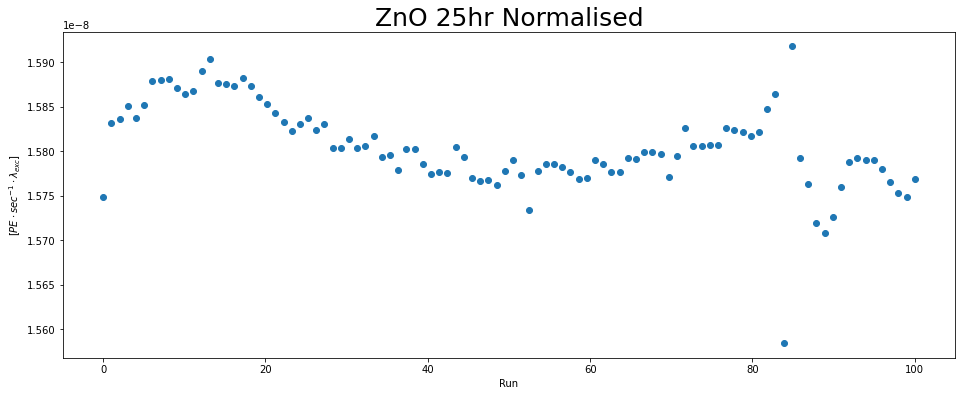

In [92]:
areas_norm = np.divide(areas, np.amax(areas)) 
plt.scatter(x_arr, areas)
plt.ylabel(r'$[PE \cdot sec^{-1} \cdot \lambda_{exc}]$')
plt.xlabel('Run')
plt.title('ZnO 25hr Normalised', fontsize=25)

Text(0.5, 1.0, 'ZnO 25hr not Normalised')

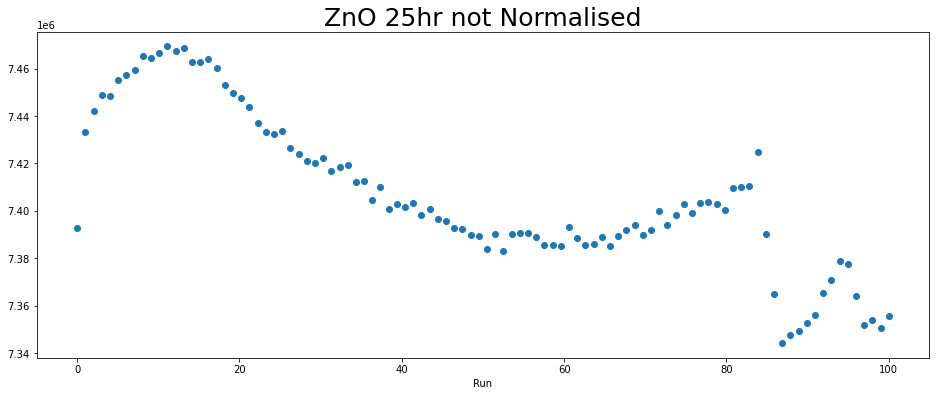

In [95]:
areas0_norm = np.divide(areas0, np.amax(areas0)) 
plt.scatter(x_arr, areas0)
plt.xlabel('Run')
plt.title('ZnO 25hr not Normalised', fontsize=25)

Text(0.5, 1.0, 'Total power')

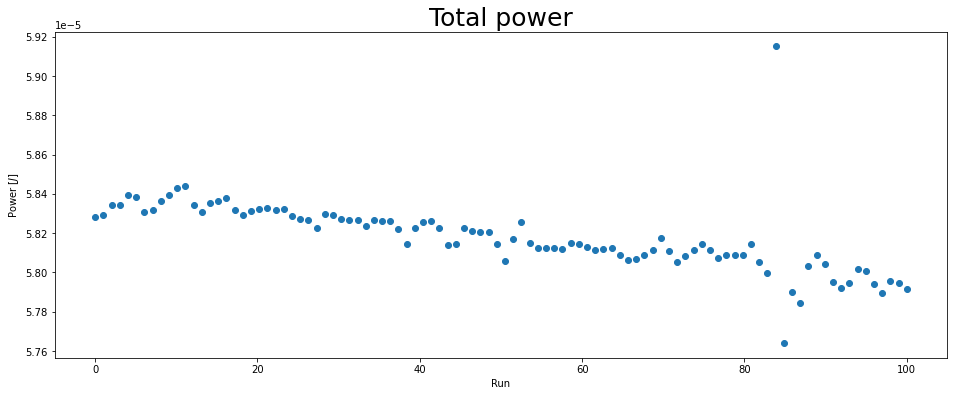

In [97]:
pws_norm = np.divide(pws, np.amax(pws)) 
plt.scatter(x_arr, pws)
plt.ylabel(r'Power [$J$]')
plt.xlabel('Run')
plt.title('Total power', fontsize=25)

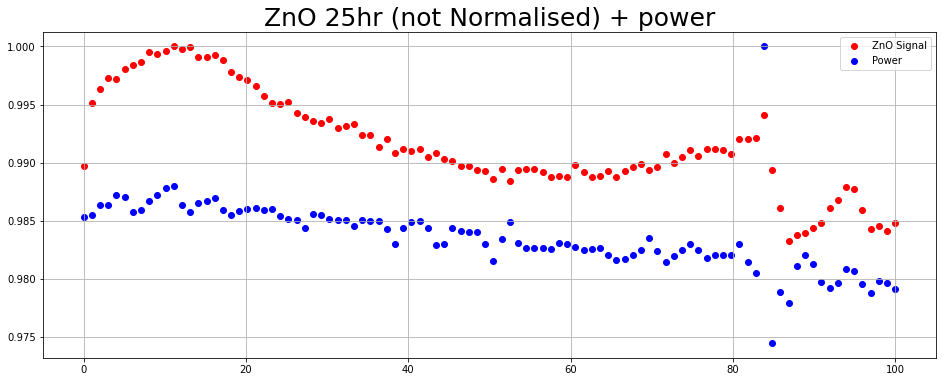

In [108]:
plt.scatter(x_arr, areas0_norm, color='red',label = 'ZnO Signal')
plt.scatter(x_arr, pws_norm, color='blue',label = 'Power')
plt.title('ZnO 25hr (not Normalised) + power', fontsize=25)
plt.grid("on")
plt.legend()

Text(0.5, 1.0, 'ZnO 25hr (Normalised) + power')

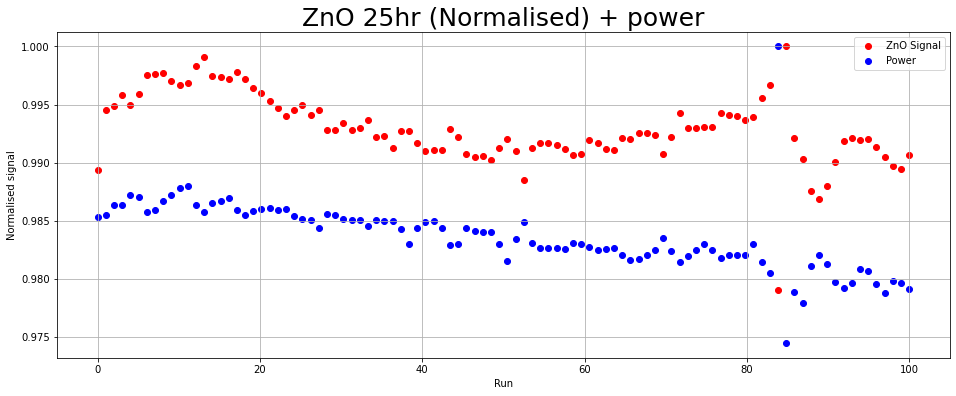

In [103]:
plt.scatter(x_arr, areas_norm, label = 'ZnO Signal',color='red')
plt.scatter(x_arr, pws_norm, label = 'Power', color='blue')
plt.ylabel('Normalised signal')
plt.xlabel('Run')
plt.legend()
plt.grid("on")
plt.title("ZnO 25hr (Normalised) + power", fontsize=25)

Text(0, 0.5, '$[PE \\cdot sec^{-1} \\cdot \\lambda_{exc}]$')

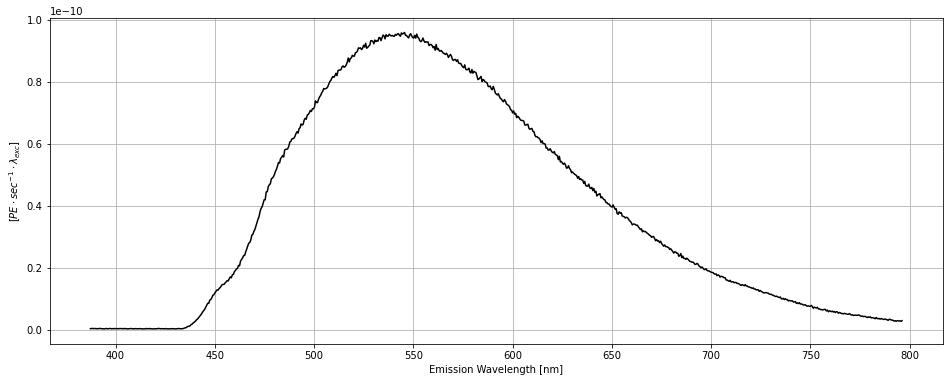

In [135]:
plt.plot(np.array(sp['em_wl']) , sp_norm, color = 'black')
plt.grid('on')
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel(r'$[PE \cdot sec^{-1} \cdot \lambda_{exc}]$')

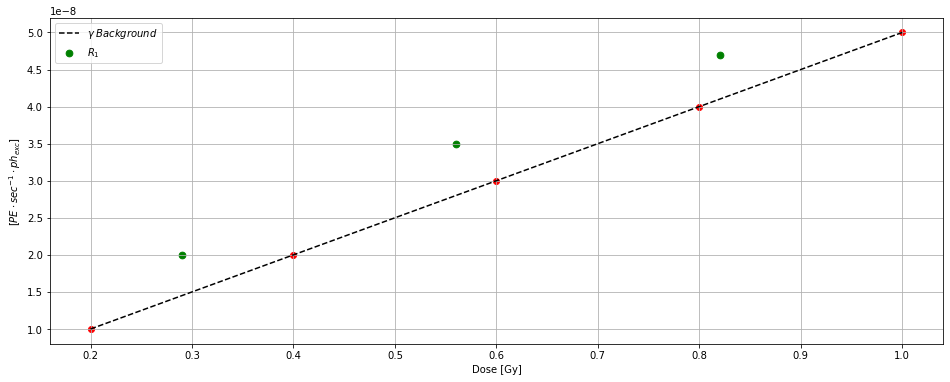

In [159]:
x = [0.2,0.4,0.6,0.8,1]; y = [1e-8, 2e-8, 3e-8, 4e-8, 5e-8]
R1_x = [0.29, 0.56, 0.82] ; R1_y = [2e-8, 3.5e-8, 4.7e-8]
plt.plot(x,y, color='black', linestyle='--', label=r'$\gamma \; Background$')
plt.scatter(x,y,color='red')
plt.scatter(R1_x, R1_y, color='green', label=r'$R_1$', s=45)
plt.grid("on")
plt.xlabel('Dose [Gy]')
plt.ylabel(r'$[PE \cdot sec^{-1} \cdot ph_{exc}]$')
plt.legend()

Text(0, 0.5, 'Signal / ($\\gamma$ dose) [AU]')

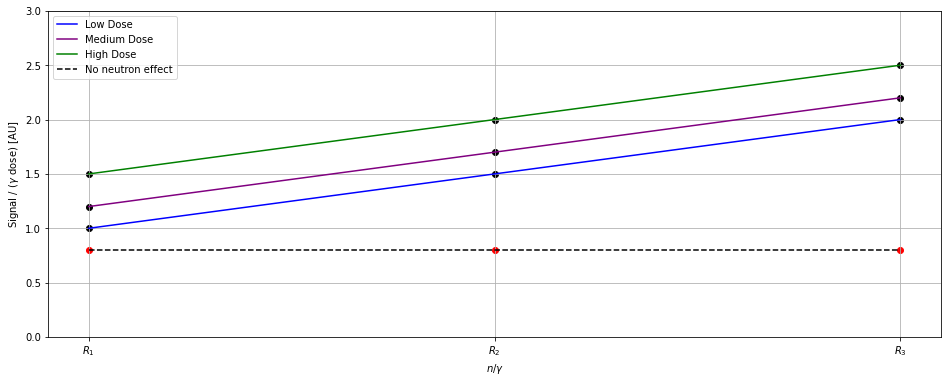

In [185]:
x = [r'$R_1$', r'$R_2$', r'$R_3$']; R_low = [1,1.5,2]; R_med = [1.2, 1.7, 2.2] ; R_high = [1.5,2,2.5]
gamma = [0.8,0.8,0.8]
plt.plot(x,R_low,color='blue', label = 'Low Dose')
plt.scatter(x,R_low, color='black')

plt.plot(x,R_med,color='purple', label = 'Medium Dose')
plt.scatter(x,R_med, color='black')

plt.plot(x,R_high,color='green', label = 'High Dose')
plt.scatter(x,R_high, color='black')

plt.plot(x,gamma, linestyle='--',color='black', label = 'No neutron effect')
plt.scatter(x,gamma,color='red')

plt.ylim(0,3)
plt.legend()
plt.grid("on")
plt.xlabel(r'$n/\gamma$')
plt.ylabel(r'Signal / ($\gamma$ dose) [AU]')

In [8]:
df_0 = 

,em_wl,count
kind,,
bg_0,387.310577,251
bg_0,387.829285,308
bg_0,388.347992,308
bg_0,388.866699,320
bg_0,389.385406,308
...,...,...
sp_0,794.166565,1626
sp_0,794.666870,1577
sp_0,795.167175,1661
